# Урок 1. Алгоритм линейной регрессии. Градиентный спуск


In [50]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 1. Подберите скорость обучения (eta) и количество итераций

Задача: предсказание баллов ЕГЭ ученика в зависимости от кол-ва лет стажа его репетитора

In [3]:
# 1 - константный признак (нужен для нулевого веса, для сдвига)
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])

In [4]:
X.shape

(10, 2)

In [5]:
# целевая переменная
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Text(0, 0.5, 'Баллы')

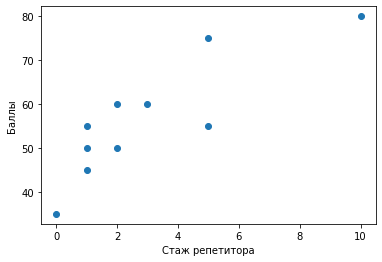

In [12]:
#зависимость целевой переменной от признака
plt.scatter(X[:, 1], y)
plt.xlabel('Стаж репетитора')
plt.ylabel('Баллы')

In [45]:
#среднеквадратическая ошибка

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [48]:
n = X.shape[0] #количество признаков
print(f'Number of objects = {n}')

Number of objects = 10


In [53]:
etas = [1, 1e-1, 1e-2, 1e-3, 1e-4] #варианты для проверки скорости обучения 
n_iters = [100, 250, 500, 750, 10000] #варианты для проверки количества итераций

mse_err = np.inf
best_result = {'eta', 'n_iter', 'mse'}

for eta in etas:
    for n_iter in n_iters:
        W = np.array([0.5, 0.5]) #инициализация веса маленькими величинами
        curr_eta = eta
        
        for i in range(n_iter): 
            y_pred = np.dot(X, W) #на каждой итерации смотрим предсказания
            err = calc_mse(y, y_pred)  #вызов функции вычисления среднеквадратической ошибки
            for k in range(W.shape[0]): #изменяем веса в цикле
                W[k] -= curr_eta * (1/n * 2 * X[:, k] @ (y_pred - y)) #умножаем скорость обучения на градиент - оптимизация веса
            if i % 10 == 0:
                curr_eta /= 1.1 #спасает от расползания ошибки до бесконечности             
                
        if err < mse_err:
            mse_err = err
            best_result = {
                'eta': eta,
                'n_iter': n_iter,
                'mse': mse_err
            }
print(f'Лучшая ошибка - ', best_result['mse'], 'при скорости обучения ', best_result['eta'], ' и количестве итераций', best_result['n_iter'])

Лучшая ошибка -  43.968755589400445 при скорости обучения  0.1  и количестве итераций 10000


### 2*. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

## ошибка *************
ValueError                                Traceback (most recent call last)
<ipython-input-34-df00614f0fcc> in <module>
     15 #         W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
     16     # ИЗМЕНЕНИЯ
---> 17     W -= eta * (1/n * 2 * np.dot(X, y_pred - y))
     18     #
     19     if i % 10 == 0:

<__array_function__ internals> in dot(*args, **kwargs)

ValueError: shapes (10,2) and (10,) not aligned: 2 (dim 1) != 10 (dim 0)  


In [58]:
n = X.shape[0]

eta = 1e-2 
n_iter = 100

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    #W -= eta * (1/n * 2 * np.dot(X, y_pred - y))
    # ИЗМЕНЕНИЯ**************************
    #из текста ошибки очевидно, что проблема возникла на этапе умножения матриц 
    #print(X.shape, (y_pred - y).shape)
    #в данном случае умножение возвможно только после транспонирования матрицы Х, что уровняет количество столбцов
    W -= eta * (1/n * 2 * np.dot(X.T, y_pred - y))    
    if i % 10 == 0:
        print(f'Iteration # ', i, ': W_new = ', W, 'MSE = ', round(err,2))


Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #  0 : W_new =  [2.08 4.27] MSE =  3047.75
Iteration #  10 : W_new =  [ 7.0011236 10.6169007] MSE =  738.65
Iteration #  20 : W_new =  [10.3486292  10.10603105] MSE =  622.03
Iteration #  30 : W_new =  [13.38789582  9.55618391] MSE =  525.24
Iteration #  40 : W_new =  [16.16088505  9.05336203] MSE =  444.66
Iteration #  50 : W_new =  [18.69110735  8.59454545] MSE =  377.58
Iteration #  60 : W_new =  [20.99981865  8.17589626] MSE =  321.72
Iteration #  70 : W_new =  [23.10641138  7.79389815] MSE =  275.22
Iteration #  80 : W_new =  [25.02858024  7.44534246] MSE =  236.5
Iteration #  90 : W_new =  [26.78247081  7.12730145] MSE =  204.27


### 3*. Вместо того, чтобы задавать количество итераций, задайте другое условие останова алгоритма - когда веса перестают изменяться меньше определенного порога  𝜖 .

In [66]:
n = X.shape[0]

eta = 1e-2 #шаг градиентного спуска (скорость обучения)
iter_num = 0 #счетчик итераций

min_weight_dist = 1e-8 #критерий сходимости (разница весов, при которой алгоритм останавливается)

W = np.array([1, 0.5]) #инициализируем веса маленькими величинами

print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

weight_dist = np.inf #задаем начальную разницу весов большим числом

while weight_dist > min_weight_dist: #сравниваем текущую разницу с условием ограничения
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    W_new = W - eta * (1/n * 2 * np.dot(X.T, y_pred - y)) #умножаем скорость обучения на градиент - оптимизация веса
    
    weight_dist = np.linalg.norm(W_new - W, ord=2) #находим растояние между весами (векторами)
    W = W_new.copy()
    
    if iter_num % 10 == 0:
        print(f'Iteration # ', iter_num, ': W_new = ', W, ', MSE = ', round(err,2), ', weight_dist = ', weight_dist)
    iter_num += 1

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #  0 : W_new =  [2.08 4.27] , MSE =  3047.75 , weight_dist =  3.921645062980585
Iteration #  10 : W_new =  [ 7.0011236 10.6169007] , MSE =  738.65 , weight_dist =  0.35961884360415197
Iteration #  20 : W_new =  [10.3486292  10.10603105] , MSE =  622.03 , weight_dist =  0.32471081577923866
Iteration #  30 : W_new =  [13.38789582  9.55618391] , MSE =  525.24 , weight_dist =  0.2962830004514919
Iteration #  40 : W_new =  [16.16088505  9.05336203] , MSE =  444.66 , weight_dist =  0.2703445935689536
Iteration #  50 : W_new =  [18.69110735  8.59454545] , MSE =  377.58 , weight_dist =  0.24667699191438447
Iteration #  60 : W_new =  [20.99981865  8.17589626] , MSE =  321.72 , weight_dist =  0.22508139532820182
Iteration #  70 : W_new =  [23.10641138  7.79389815] , MSE =  275.22 , weight_dist =  0.2053764079483903
Iteration #  80 : W_new =  [25.02858024  7.44534246] , MSE =  236.5 , weight_dist =